In [41]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/train.csv')

In [43]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [44]:
Y_train

array([7, 1, 0, ..., 1, 1, 1])

In [47]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

    def ReLU_deriv(Z):
      return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

    def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
      W1 = W1 - alpha * dW1
      b1 = b1 - alpha * db1
      W2 = W2 - alpha * dW2
      b2 = b2 - alpha * db2
      return W1, b1, W2, b2

In [48]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [49]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 9 4 ... 9 9 9] [7 1 0 ... 1 1 1]
0.0721951219512195
Iteration:  10
[7 9 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.19
Iteration:  20
[7 9 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.27714634146341466
Iteration:  30
[7 9 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.344390243902439
Iteration:  40
[7 9 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.3897317073170732
Iteration:  50
[7 9 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.43285365853658536
Iteration:  60
[7 1 0 ... 9 9 9] [7 1 0 ... 1 1 1]
0.49253658536585365
Iteration:  70
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.5646829268292682
Iteration:  80
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.6172926829268293
Iteration:  90
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.6485853658536586
Iteration:  100
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.6695609756097561
Iteration:  110
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.6899268292682926
Iteration:  120
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.706780487804878
Iteration:  130
[7 1 0 ... 1 1 1] [7 1 0 ... 1 1 1]
0.7210731707317073
Iteration:  140
[7 1 0 ... 1 1

In [50]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [7]
Label:  7


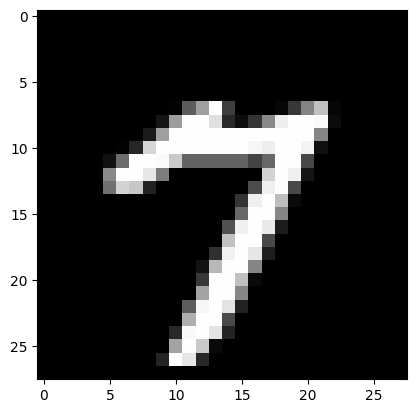

Prediction:  [1]
Label:  1


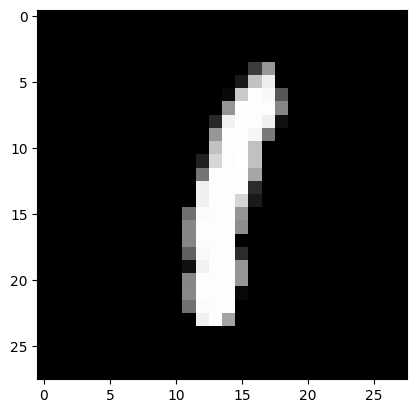

Prediction:  [0]
Label:  0


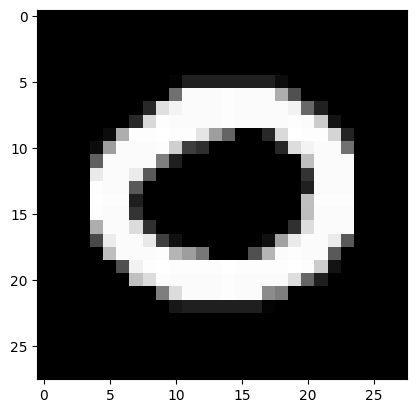

Prediction:  [2]
Label:  3


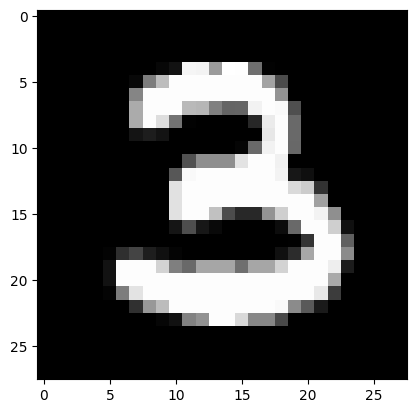

In [51]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [52]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[0 7 6 8 3 3 7 3 7 4 6 4 6 3 5 2 5 8 7 1 1 8 8 6 8 5 2 8 8 1 9 3 7 3 1 2 7
 3 7 8 0 1 7 2 0 3 6 2 0 6 9 9 5 6 7 6 0 6 1 0 5 8 0 6 6 8 7 5 6 5 7 9 4 3
 1 9 5 3 6 4 8 7 4 0 7 9 9 8 9 5 4 3 9 7 7 6 7 1 8 9 7 9 1 4 5 8 3 9 1 6 7
 9 7 4 8 7 1 4 9 7 5 2 3 1 6 8 5 2 7 4 4 2 7 3 9 9 6 0 2 5 4 6 0 1 3 8 9 9
 8 0 6 4 1 7 7 9 4 3 9 9 5 2 0 1 8 6 2 0 6 2 8 7 4 4 8 2 5 0 8 0 0 5 2 2 8
 7 8 1 7 6 8 7 3 7 0 7 3 4 1 2 3 1 0 7 8 5 3 9 0 6 8 2 8 0 0 1 1 7 3 1 2 3
 2 8 1 0 4 7 9 7 7 0 7 0 4 4 4 6 1 4 8 0 1 6 4 6 1 6 6 1 6 1 7 3 7 4 6 8 6
 8 4 3 8 7 1 2 7 5 0 1 2 8 3 5 0 4 5 1 8 7 0 3 3 3 6 3 0 2 7 4 1 4 5 3 0 4
 7 8 9 3 0 2 1 5 4 9 3 7 9 1 6 3 4 2 7 0 1 3 6 3 3 2 1 3 1 6 9 4 7 4 9 3 8
 5 3 4 1 6 0 5 3 8 0 5 0 7 0 4 7 1 0 4 4 3 8 2 6 2 1 6 2 2 1 0 4 3 3 1 0 1
 1 1 4 9 0 2 9 9 8 9 4 3 1 5 4 7 3 2 9 3 8 4 5 6 7 8 8 3 5 7 1 5 4 2 8 5 1
 1 3 6 6 3 7 1 1 0 2 1 5 9 4 7 5 9 2 0 6 1 7 5 9 2 7 1 2 9 3 7 1 1 2 8 1 9
 4 3 3 3 6 0 4 0 8 3 2 8 0 1 5 6 8 8 4 8 7 6 9 5 3 6 1 9 0 0 4 2 5 6 2 8 2
 3 2 9 2 1 2 9 5 8 0 0 8 

np.float64(0.836)